In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

# 1. Get US bond data

In [2]:
quandl.ApiConfig.api_key = 'gYL2PmF7subS5YaKyJuj'

In [151]:
UStrs_df = quandl.get('USTREASURY/YIELD')
UStrs_df = UStrs_df.dropna()
UStrs_df.columns = ['1mo',
                    '2mo',
                    '3mo', 
                    '6mo',
                    '1y',
                    '2y',
                    '3y',
                    '5y',
                    '7y',
                    '10y',
                    '20y',
                    '30y']

In [152]:
UStrs_df.head()

,1mo,2mo,3mo,6mo,1y,2y,3y,5y,7y,10y,20y,30y
Date,,,,,,,,,,,,
2018-10-16,2.1900,2.2200,2.3000,2.4600,2.6600,2.8700,2.9500,3.0200,3.1000,3.1600,3.2600,3.3200
2018-10-17,2.2000,2.2300,2.3100,2.4700,2.6600,2.8900,2.9700,3.0400,3.1300,3.1900,3.2900,3.3500
2018-10-18,2.1900,2.2300,2.3200,2.4700,2.6700,2.8700,2.9500,3.0300,3.1100,3.1700,3.2800,3.3600
2018-10-19,2.1900,2.2300,2.3100,2.4800,2.6700,2.9200,2.9900,3.0500,3.1400,3.2000,3.3100,3.3800
2018-10-22,2.1800,2.2500,2.3400,2.4900,2.6800,2.9200,2.9900,3.0500,3.1300,3.2000,3.3100,3.3800


In [153]:
UStrs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 972 entries, 2018-10-16 to 2022-09-02
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1mo     972 non-null    float64
 1   2mo     972 non-null    float64
 2   3mo     972 non-null    float64
 3   6mo     972 non-null    float64
 4   1y      972 non-null    float64
 5   2y      972 non-null    float64
 6   3y      972 non-null    float64
 7   5y      972 non-null    float64
 8   7y      972 non-null    float64
 9   10y     972 non-null    float64
 10  20y     972 non-null    float64
 11  30y     972 non-null    float64
dtypes: float64(12)
memory usage: 98.7 KB


In [154]:
UStrs_df.describe()

,1mo,2mo,3mo,6mo,1y,2y,3y,5y,7y,10y,20y,30y
count,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000,972.0000
mean,0.9104,0.9508,0.9789,1.0718,1.1404,1.2352,1.3122,1.4567,1.6276,1.7587,2.1551,2.2505
std,0.9882,0.9991,1.0062,1.0533,1.0746,1.0639,1.0289,0.9232,0.8375,0.7641,0.6821,0.6010
min,0.0000,0.0000,0.0000,0.0200,0.0400,0.0900,0.1000,0.1900,0.3600,0.5200,0.8700,0.9900
25%,0.0600,0.0700,0.0700,0.0900,0.1200,0.1700,0.3100,0.6675,0.9675,1.1975,1.7575,1.8500
50%,0.1400,0.2150,0.3400,0.5950,0.8900,1.1800,1.3450,1.4000,1.5000,1.6500,2.1000,2.2100
75%,2.0625,2.0450,2.0125,2.0800,2.0300,2.2800,2.2700,2.2925,2.3825,2.4325,2.6825,2.8225
max,2.5300,2.8000,2.9700,3.3400,3.5100,3.5100,3.6000,3.6100,3.6000,3.4900,3.7200,3.4600


# 2. Visualization of raw data

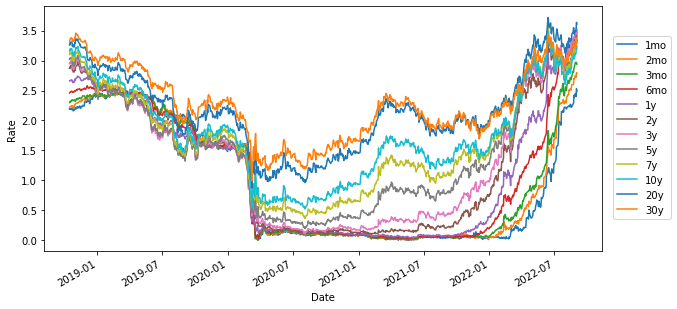

In [155]:
UStrs_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

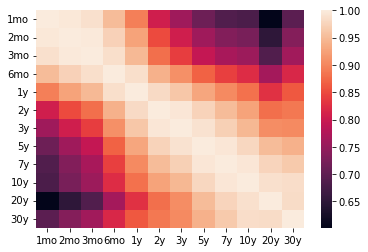

In [156]:
sns.heatmap(UStrs_df.corr())
plt.show()

*Correlation matrix btw each maturities

# 3. Produce Primary Components

In [157]:
from sklearn.decomposition import PCA

In [158]:
pca = PCA(copy=True, iterated_power='auto', n_components=3, random_state=None, svd_solver='auto', tol=0.0, whiten=False)
pca.fit(UStrs_df)

PCA(n_components=3)

*'n_components means' the number of PCs which we use. 

*As illustrated later, as relevant literatures indicate, 3 PCs explain no less than 95% of the movement of yield curves.

# 4. What PCs consists of ? 

In [159]:
factor_loading = pd.DataFrame(pca.components_,
             columns=['1m',
                    '2m',
                    '3m', 
                    '6m',
                    '1y',
                    '2y',
                    '3y',
                    '5y',
                    '7y',
                    '10y',
                    '20y',
                    '30y'],
             index=[f'PC{i+1}' for i in range(pca.n_components_)])

In [160]:
factor_loading = factor_loading.transpose()

In [161]:
factor_loading.head(12)

,PC1,PC2,PC3
1m,0.2885,-0.4528,-0.2560
2m,0.3019,-0.3958,-0.1660
3m,0.3108,-0.3455,-0.0921
6m,0.3373,-0.2135,0.1027
1y,0.3491,-0.0511,0.2828
2y,0.3417,0.1413,0.4152
3y,0.3259,0.2290,0.3685
5y,0.2870,0.2956,0.0856
7y,0.2558,0.3077,-0.1306
10y,0.2302,0.2859,-0.3261


*Each contribution of each maturities to the PCs

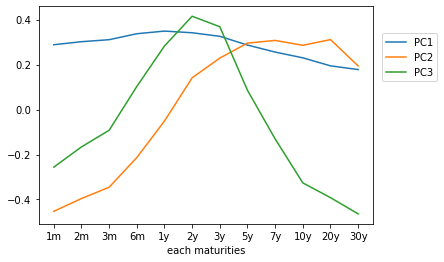

In [162]:
plt.plot(factor_loading)
plt.xlabel('each maturities')
plt.legend(factor_loading, bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

*Factor loading chart. Relevant literature interprets each PC as follows;

*PC1: General level of yield curve (because each yield has equally contributed PC1.)

*PC2: Slope of yield curve (because the short end and the long end zone move opposite direction)

*PC3: Curvature of yield zone (??)

# 5. To what extent the PCs explain the movement of the yield curve ?

In [163]:
expl_varr = pd.DataFrame(pca.explained_variance_ratio_, columns=['Contribution'], index = ['PC1','PC2','PC3'] )

In [164]:
expl_varr.head()

,Contribution
PC1,0.8969
PC2,0.0878
PC3,0.0128


*How much ratio each PC explains about the the movement of yield curves. 

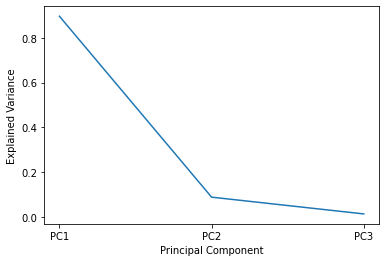

In [165]:
plt.plot(expl_varr)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.show()

# 6. Reconstruct the raw data by PCs

In [166]:
vals = pca.transform(UStrs_df)

In [167]:
pd.options.display.float_format = '{:.4f}'.format
vals_df = pd.DataFrame(vals, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
vals_df['date'] = UStrs_df.index
vals_df.set_index('date', inplace=True)

vals_df.head()

,PC1,PC2,PC3
date,,,
2018-10-16,4.8074,0.5612,-0.2505
2018-10-17,4.8646,0.5934,-0.2766
2018-10-18,4.8422,0.5706,-0.2802
2018-10-19,4.9023,0.6250,-0.2758
2018-10-22,4.9191,0.6056,-0.2742


*Raw data has been transformed as expressed by PCs

*It is difficult to get practical interpretation from each figure.

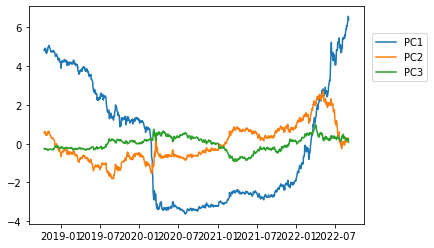

In [168]:
plt.plot(vals_df)
plt.legend(vals_df, bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

# 7. Reconstruct the yield curve 

In [169]:
UStrs_projected = pca.inverse_transform(vals)

In [170]:
UStrs_projected

array([[2.10721817, 2.22176287, 2.30239309, ..., 3.10729473, 3.36313343,
        3.33107727],
       [2.11582828, 2.23062998, 2.31145992, ..., 3.13819294, 3.39452379,
        3.35963297],
       [2.12064693, 2.23351572, 2.31272848, ..., 3.12769875, 3.3844874 ,
        3.35290988],
       ...,
       [2.5813465 , 2.73993341, 2.85223999, ..., 3.20138392, 3.36241862,
        3.31099967],
       [2.64806995, 2.80325913, 2.91251803, ..., 3.31690042, 3.47914298,
        3.42382254],
       [2.64276955, 2.78754222, 2.88835715, ..., 3.26532217, 3.43438405,
        3.39420144]])

In [171]:
reUStrs_df = pd.DataFrame(UStrs_projected, 
                          columns = ['1mo',
                                     '2mo',
                                     '3mo',
                                     '6mo',
                                     '1y',
                                     '2y',
                                     '3y',
                                     '5y',
                                     '7y',
                                     '10y',
                                     '20y',
                                     '30y'])
reUStrs_df['date'] = UStrs_df.index
reUStrs_df.set_index('date', inplace=True)

In [172]:
reUStrs_df.head()

,1mo,2mo,3mo,6mo,1y,2y,3y,5y,7y,10y,20y,30y
date,,,,,,,,,,,,
2018-10-16,2.1072,2.2218,2.3024,2.5480,2.7195,2.8534,2.9154,2.9807,3.0628,3.1073,3.3631,3.3311
2018-10-17,2.1158,2.2306,2.3115,2.5578,2.7304,2.8666,2.9318,3.0044,3.0908,3.1382,3.3945,3.3596
2018-10-18,2.1206,2.2335,2.3127,2.5547,2.7227,2.8542,2.9179,2.9909,3.0785,3.1277,3.3845,3.3529
2018-10-19,2.1122,2.2294,2.3122,2.5638,2.7422,2.8843,2.9516,3.0247,3.1101,3.1557,3.4114,3.3721
2018-10-22,2.1254,2.2419,2.3240,2.5738,2.7495,2.8880,2.9532,3.0239,3.1082,3.1534,3.4080,3.3706


In [183]:
combo=pd.DataFrame()

combo['1mo_raw']=UStrs_df['1mo']
combo['1mo_re']=reUStrs_df['1mo']
combo['2y_raw']=UStrs_df['2y']
combo['2y_re']=reUStrs_df['2y']
combo['10y_raw']=UStrs_df['10y']
combo['10y_re']=reUStrs_df['10y']
combo['20y_raw']=UStrs_df['20y']
combo['20y_re']=reUStrs_df['20y']

combo['date'] = UStrs_df.index
combo.set_index('date', inplace=True)

In [184]:
combo.head()

,1mo_raw,1mo_re,2y_raw,2y_re,10y_raw,10y_re,20y_raw,20y_re
date,,,,,,,,
2018-10-16,2.1900,2.1072,2.8700,2.8534,3.1600,3.1073,3.2600,3.3631
2018-10-17,2.2000,2.1158,2.8900,2.8666,3.1900,3.1382,3.2900,3.3945
2018-10-18,2.1900,2.1206,2.8700,2.8542,3.1700,3.1277,3.2800,3.3845
2018-10-19,2.1900,2.1122,2.9200,2.8843,3.2000,3.1557,3.3100,3.4114
2018-10-22,2.1800,2.1254,2.9200,2.8880,3.2000,3.1534,3.3100,3.4080


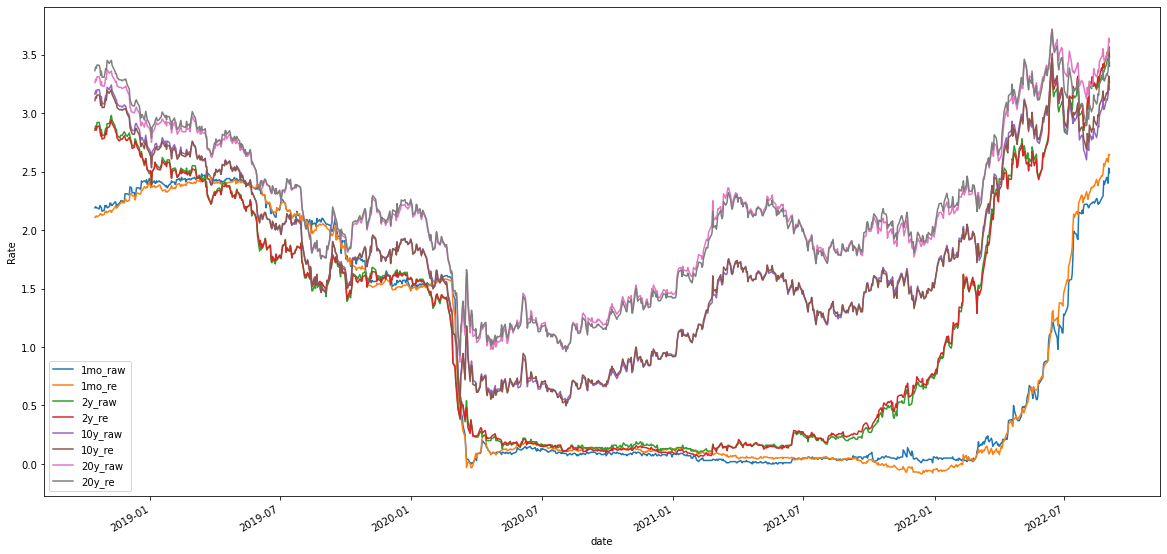

In [192]:
combo.plot(figsize=(20,10))
plt.ylabel("Rate")
plt.show()

*It is obvious that 3 PCs can explain almost all of the yield curve

# 8. Calculate residual (= gap between original data and reconstructed one) 

In [188]:
loss_1mo = np.sum((combo['1mo_raw'] - combo['1mo_re']) ** 2)
loss_2y = np.sum((combo['2y_raw'] - combo['2y_re']) ** 2)
loss_10y = np.sum((combo['10y_raw'] - combo['10y_re']) ** 2)
loss_20y = np.sum((combo['20y_raw'] - combo['20y_re']) ** 2)

In [191]:
print(loss_1mo)
print(loss_2y)
print(loss_10y)
print(loss_20y)

3.637621794046594
0.8159879074195346
0.5988398627841347
3.0663128112854254


*Up to the maturities, there is difference. But I have no idea on the measurement of big or small...